# Лабораторная работа 7: Решающие деревья
## Выполнила: Иванова Елизавета Дмитриевна, НПМбд-01-19

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [make_circles(noise=0.2, factor=0.5, random_state=42),
            make_moons(noise=0.2, random_state=42),
            make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, 
                                class_sep=.8, random_state=3, n_redundant=0., )]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

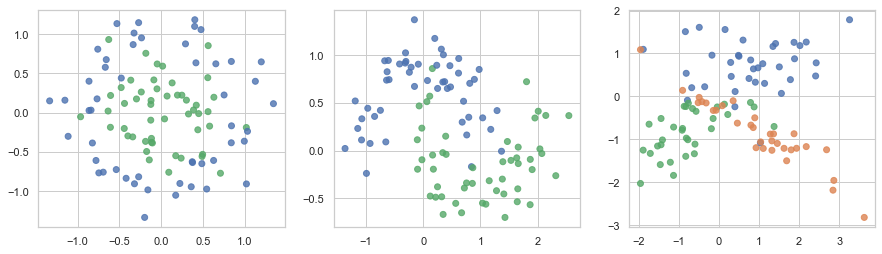

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

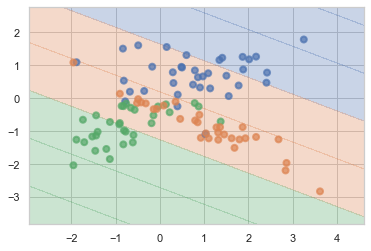

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.metrics import accuracy_score

def plot_surface_1(X_train, X_test, y_train, y_test, Decision_Tree, name):
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    fig.suptitle('\nВыборка: ' + name, fontsize=18)
    
    x, y = np.array([X_train, X_test]), np.array([y_train, y_test])
    plot_step = 0.01
    
    t = ['Train', 'Test']
    ac = ['\nTrain accuracy: ', '\nTest accuracy: ']
    
    for i in range(2):
        
        palette = sns.color_palette(n_colors=len(np.unique(y[i])))
        cmap = ListedColormap(palette)    

        x_min, x_max = x[i][:, 0].min() - 1, x[i][:, 0].max() + 1
        y_min, y_max = x[i][:, 1].min() - 1, x[i][:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = Decision_Tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = ax[i].contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

        ax[i].scatter(x[i][:, 0], x[i][:, 1], c=y[i], cmap=cmap, alpha=.7, edgecolors=np.array(palette)[y[i]], linewidths=2)
        ax[i].set_title(t[i] + ac[i] + str(round(accuracy_score(y[i], Decision_Tree.predict(x[i])), 2)), fontsize=15)

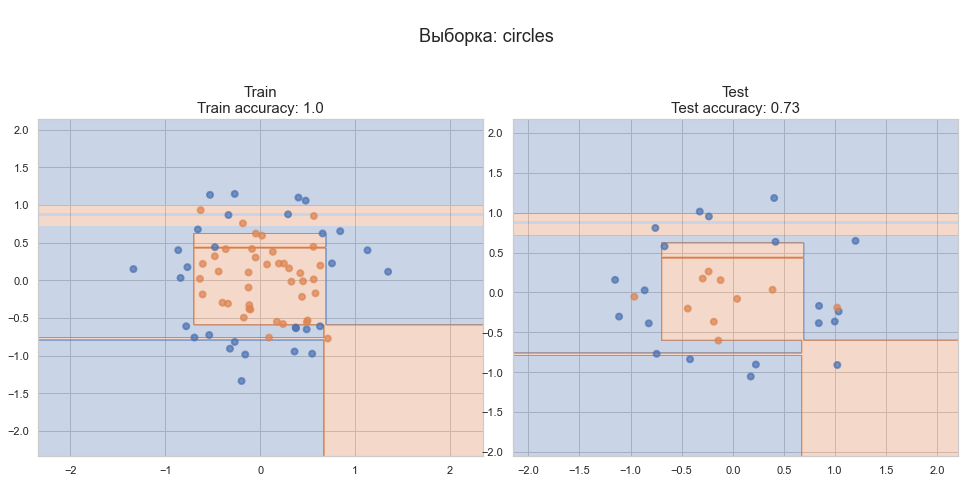

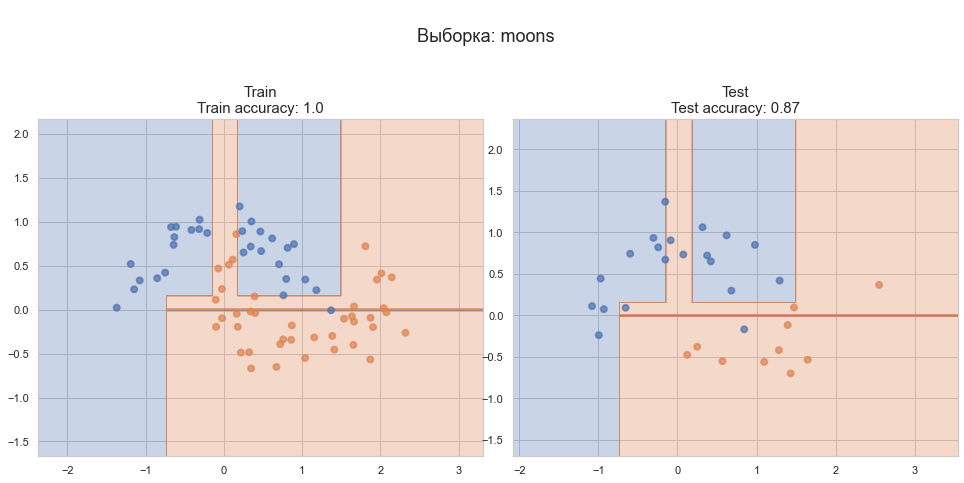

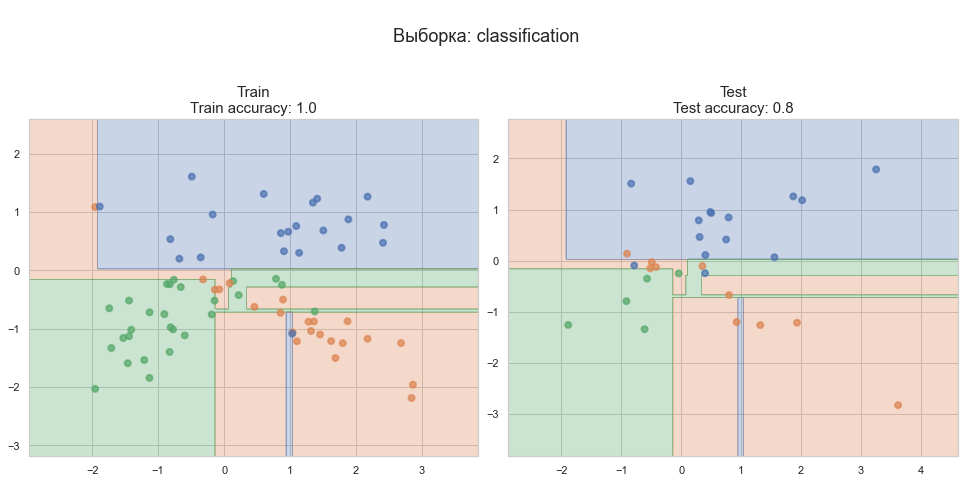

In [8]:
name = ['circles', 'moons', 'classification']

for i, (x, y) in enumerate(datasets):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.7)
    Decision_Tree = DecisionTreeClassifier().fit(X_train, y_train)
    plot_surface_1(X_train, X_test, y_train, y_test, Decision_Tree, name[i])

__Ответ:__ 

*При обучении мы получили 100% точность на всех выборках. При тестировании точность уменьшилась, так как решающие деревья переобучились из-за того, что модель пытается описать не выборку в целом, а каждый объект отдельно: например, во время обучения появилиь оранжевые области там, где были единичные оранжевые объекты, а затем эти области перенеслись на тесты.*

__2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

**Меняем параметр max_depth:**

In [9]:
def plot_surface_depth(X_train, X_test, y_train, y_test, name):
    
    x, y = np.array([X_train, X_test]), np.array([y_train, y_test])
    plot_step = 0.01
    
    t = ['\nTrain', '\nTest']
    ac = ['\nTrain accuracy: ', '\nTest accuracy: ']
    depths = np.array([2, 6])
    
    for depth in depths:
        
        fig, ax = plt.subplots(1, 4, figsize=(16, 5))
        
        Decision_Tree = DecisionTreeClassifier(max_depth = depth).fit(X_train, y_train)
        for i in range(2):
            
            palette = sns.color_palette(n_colors=len(np.unique(y[i])))
            cmap = ListedColormap(palette)    

            x_min, x_max = x[i][:, 0].min() - 1, x[i][:, 0].max() + 1
            y_min, y_max = x[i][:, 1].min() - 1, x[i][:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = Decision_Tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = ax[i].contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

            ax[i].scatter(x[i][:, 0], x[i][:, 1], c=y[i], cmap=cmap, alpha=.7, edgecolors=np.array(palette)[y[i]], 
                          linewidths=2)
            ax[i].set_title('Выборка: ' + name + t[i] + ac[i] + 
                            str(round(accuracy_score(y[i], Decision_Tree.predict(x[i])), 4)) + 
                            '\nmax_depth: ' + str(depth), fontsize=15)
        
        Decision_Tree = DecisionTreeClassifier(max_depth = depth + 2).fit(X_train, y_train)
        for i in range(2):
            
            palette = sns.color_palette(n_colors=len(np.unique(y[i])))
            cmap = ListedColormap(palette)    

            x_min, x_max = x[i][:, 0].min() - 1, x[i][:, 0].max() + 1
            y_min, y_max = x[i][:, 1].min() - 1, x[i][:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = Decision_Tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = ax[i+2].contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

            ax[i+2].scatter(x[i][:, 0], x[i][:, 1], c=y[i], cmap=cmap, alpha=.7, edgecolors=np.array(palette)[y[i]],
                            linewidths=2)
            ax[i+2].set_title('Выборка: ' + name + t[i] + ac[i] + 
                              str(round(accuracy_score(y[i], Decision_Tree.predict(x[i])), 4)) + 
                              '\nmax_depth: ' + str(depth + 2), fontsize=15)

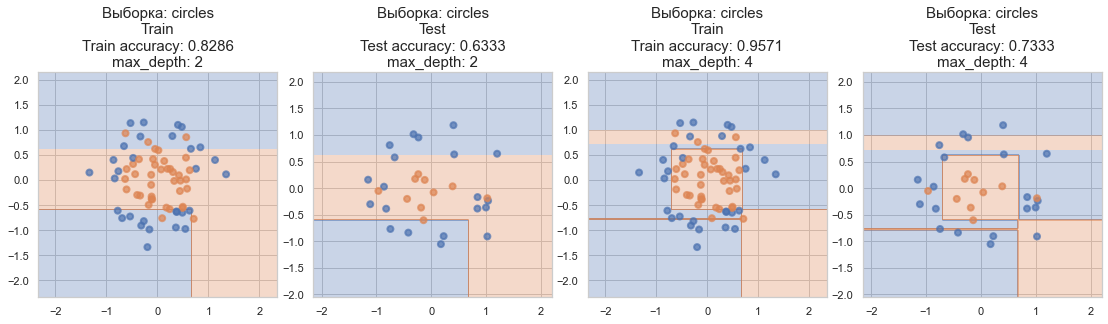

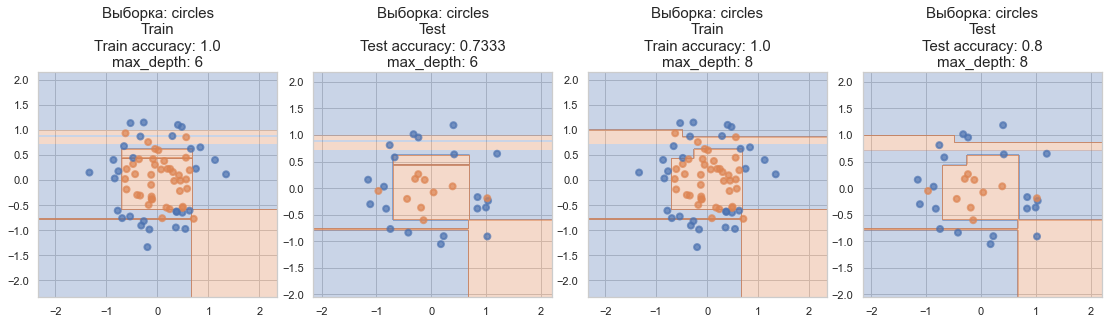

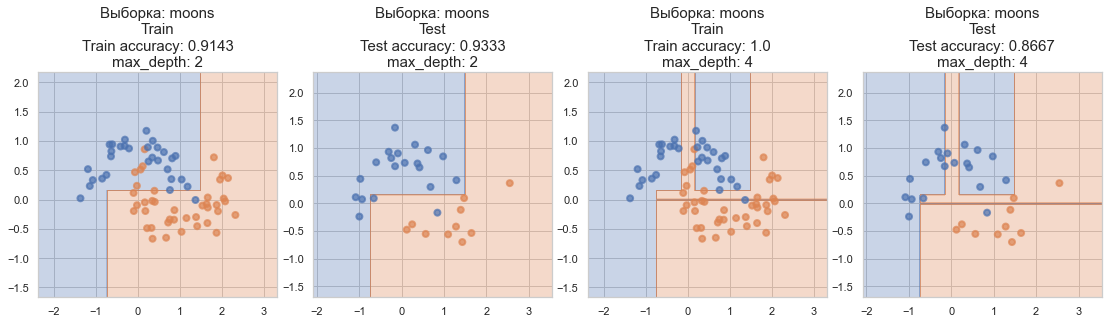

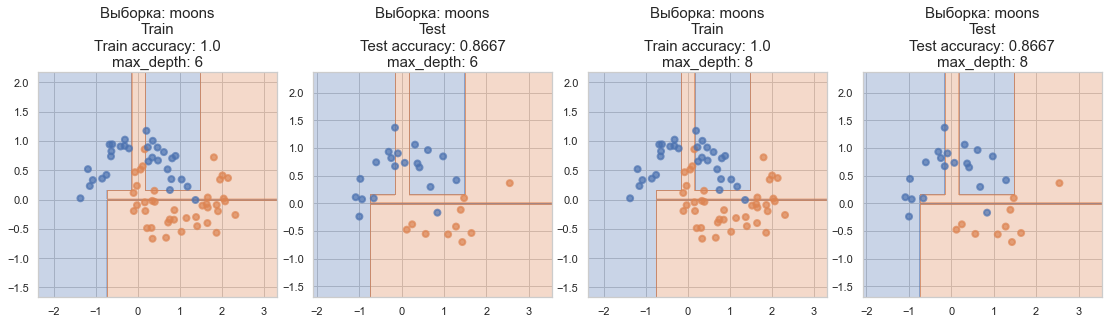

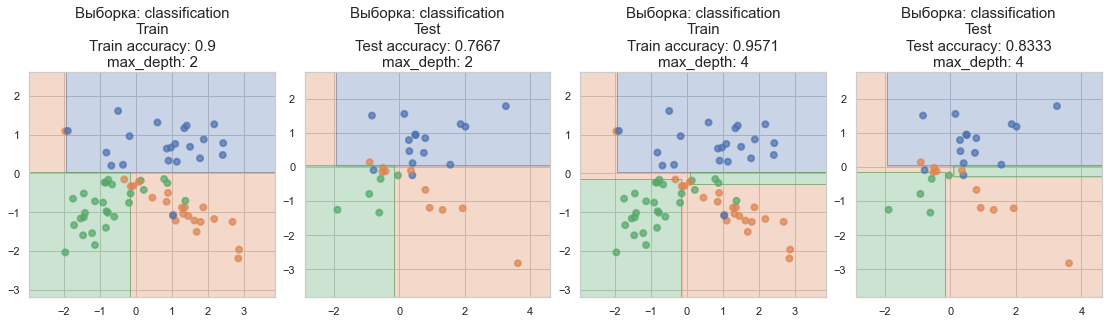

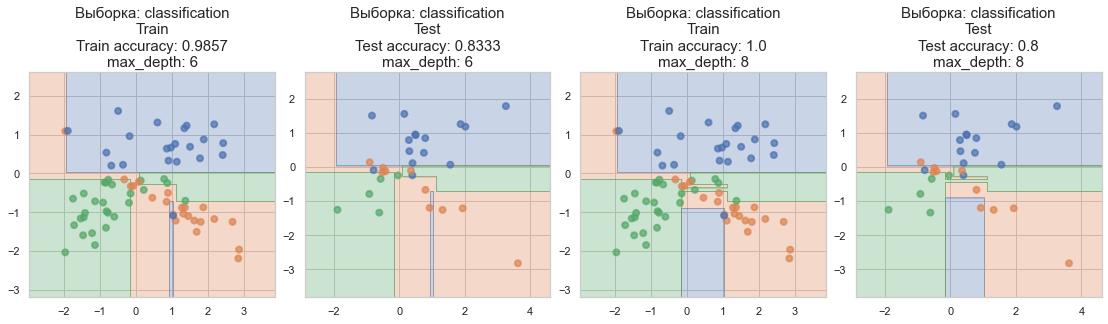

In [10]:
name = ['circles', 'moons', 'classification']

for i, (x, y) in enumerate(datasets):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.7)
    plot_surface_depth(X_train, X_test, y_train, y_test, name[i])

**Меняем параметр min_samples_leaf:**

In [11]:
def plot_surface_samples(X_train, X_test, y_train, y_test, name):
    
    x, y = np.array([X_train, X_test]), np.array([y_train, y_test])
    plot_step = 0.01
    
    t = ['\nTrain', '\nTest']
    ac = ['\nTrain accuracy: ', '\nTest accuracy: ']
    samples = np.array([2, 6])
    
    for sample in samples:
        fig, ax = plt.subplots(1, 4, figsize=(16, 5))
        
        Decision_Tree = DecisionTreeClassifier(min_samples_leaf = sample).fit(X_train, y_train)
        for i in range(2):
            
            palette = sns.color_palette(n_colors=len(np.unique(y[i])))
            cmap = ListedColormap(palette)    

            x_min, x_max = x[i][:, 0].min() - 1, x[i][:, 0].max() + 1
            y_min, y_max = x[i][:, 1].min() - 1, x[i][:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = Decision_Tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = ax[i].contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

            ax[i].scatter(x[i][:, 0], x[i][:, 1], c=y[i], cmap=cmap, alpha=.7, edgecolors=np.array(palette)[y[i]], 
                          linewidths=2)
            ax[i].set_title('Выборка: ' + name + t[i] + ac[i] + 
                            str(round(accuracy_score(y[i], Decision_Tree.predict(x[i])), 4))  + 
                            '\nmin_samples_leaf: ' + str(sample), fontsize=15)
        
        Decision_Tree = DecisionTreeClassifier(min_samples_leaf = sample + 2).fit(X_train, y_train)
        for i in range(2):
            
            palette = sns.color_palette(n_colors=len(np.unique(y[i])))
            cmap = ListedColormap(palette)    

            x_min, x_max = x[i][:, 0].min() - 1, x[i][:, 0].max() + 1
            y_min, y_max = x[i][:, 1].min() - 1, x[i][:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                                 np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = Decision_Tree.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = ax[i+2].contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

            ax[i+2].scatter(x[i][:, 0], x[i][:, 1], c=y[i], cmap=cmap, alpha=.7, edgecolors=np.array(palette)[y[i]], 
                            linewidths=2)
            ax[i+2].set_title('Выборка: ' + name + t[i] + ac[i] + 
                              str(round(accuracy_score(y[i], Decision_Tree.predict(x[i])), 4)) + 
                              '\nmin_samples_leaf: ' + str(sample + 2), fontsize=15)

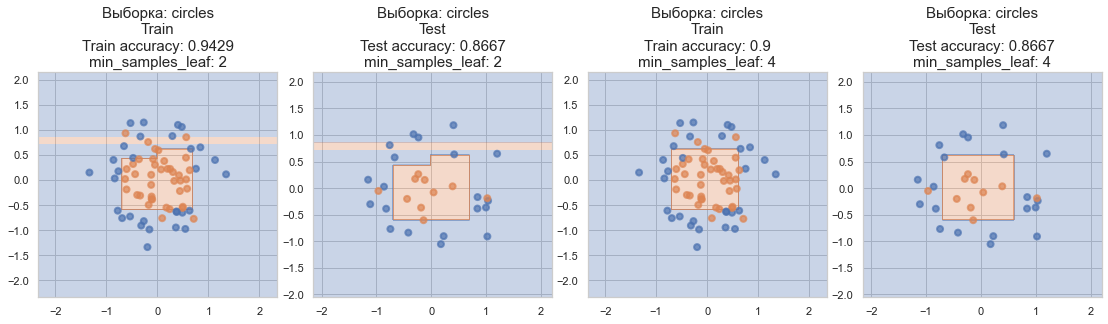

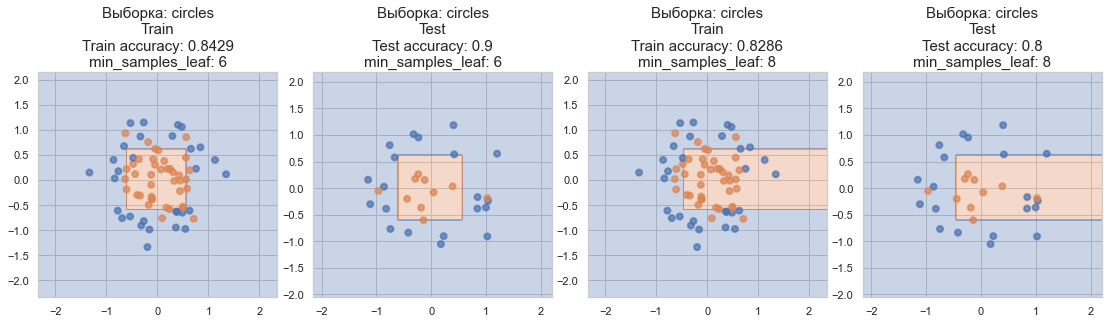

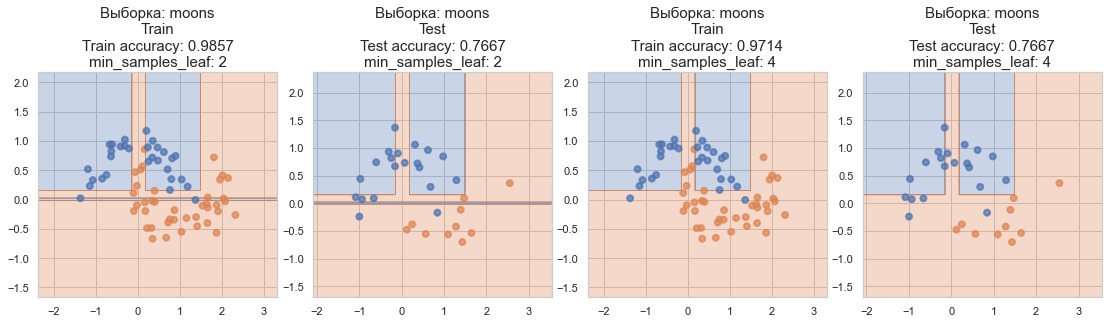

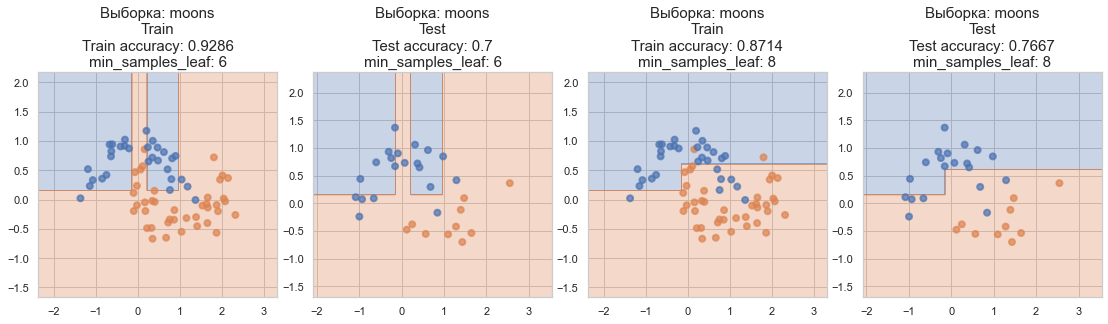

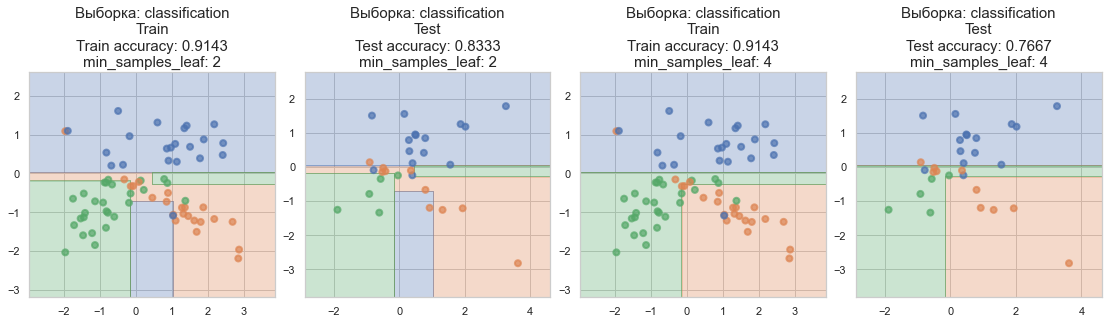

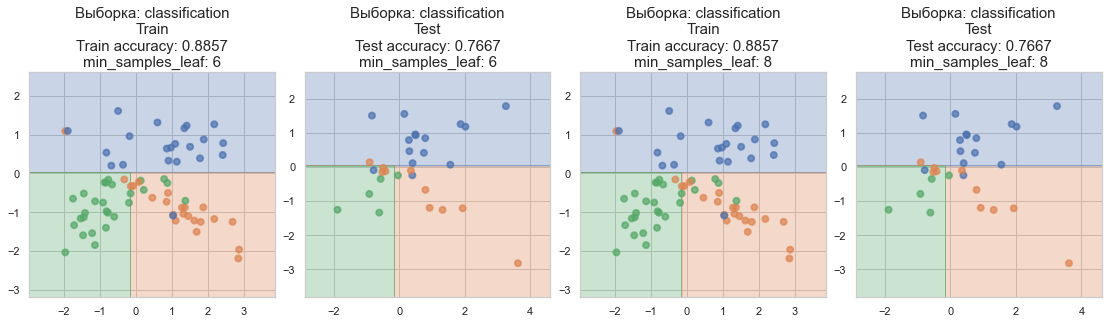

In [12]:
name = ['circles', 'moons', 'classification']

for i, (x, y) in enumerate(datasets):
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size=0.7)
    plot_surface_samples(X_train, X_test, y_train, y_test, name[i])

__Ответ:__

*При увеличении максимальной глубины и при уменьшении минимального количества объектов растёт точноть на обучающей выборке.*

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [13]:
df = pd.read_csv('agaricus-lepiota.data')
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
for i in range(len(df.columns)):
    df.iloc[:, i] = LabelEncoder().fit_transform(df.iloc[:, i])
df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], train_size=0.7, random_state=42)
Decision_Tree = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy:', Decision_Tree.score(X_test, y_test))

Accuracy: 1.0


__14. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [17]:
df = pd.read_csv('tic-tac-toe.data')
df

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [18]:
for i in range(len(df.columns)):
    df.iloc[:, i] = LabelEncoder().fit_transform(df.iloc[:, i])
df

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


In [19]:
X = np.array(df.drop('positive', axis = 1))
y = np.array(df['positive'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

In [20]:
Accuracy_max_depth = []
Accuracy_min_samples_split = []
Accuracy_min_samples_leaf = []

for i in range(30):
    Decision_Tree_max_depth = DecisionTreeClassifier(max_depth = 1 + i).fit(X_train, y_train)
    Accuracy_max_depth.append(Decision_Tree_max_depth.score(X_test, y_test))
    
    Decision_Tree_min_samples_split = DecisionTreeClassifier(min_samples_split = 2 + i).fit(X_train, y_train)
    Accuracy_min_samples_split.append(Decision_Tree_min_samples_split.score(X_test, y_test))
    
    Decision_Tree_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf = 1 + i).fit(X_train, y_train)
    Accuracy_min_samples_leaf.append(Decision_Tree_min_samples_leaf.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

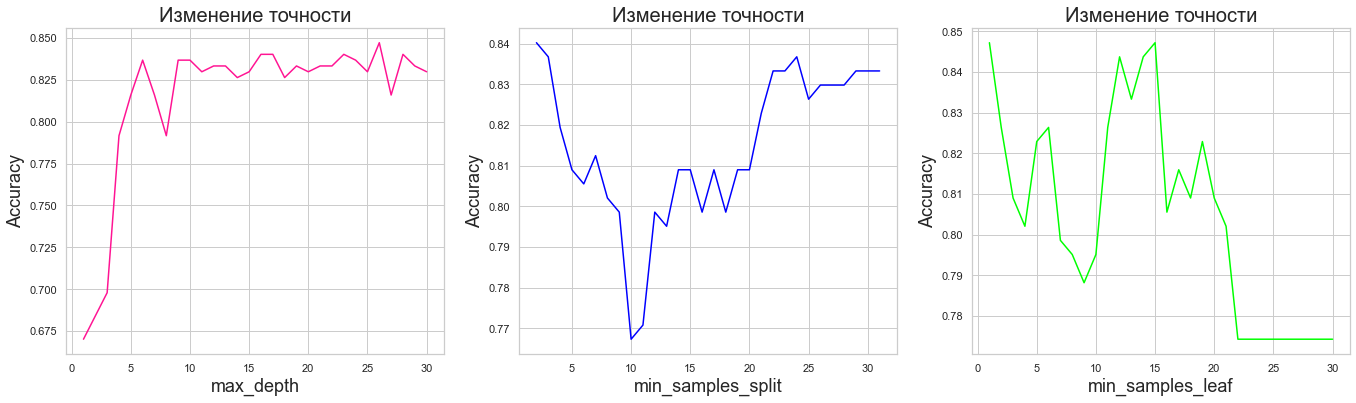

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (23, 6))

ax[0].plot(np.arange(1, 31), Accuracy_max_depth, color = 'DeepPink')
ax[0].set_title('Изменение точности', fontsize = 20)
ax[0].set_xlabel('max_depth', fontsize = 18)
ax[0].set_ylabel('Accuracy', fontsize = 18)

ax[1].plot(np.arange(2, 32), Accuracy_min_samples_split, color = 'Blue')
ax[1].set_title('Изменение точности', fontsize = 20)
ax[1].set_xlabel('min_samples_split', fontsize = 18)
ax[1].set_ylabel('Accuracy', fontsize = 18)

ax[2].plot(np.arange(1, 31), Accuracy_min_samples_leaf, color = 'Lime')
ax[2].set_title('Изменение точности', fontsize = 20)
ax[2].set_xlabel('min_samples_leaf', fontsize = 18)
ax[2].set_ylabel('Accuracy', fontsize = 18)

__15. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
mushrooms = pd.read_csv('agaricus-lepiota.data')
tic_tac_toe = pd.read_csv('tic-tac-toe.data')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')

In [24]:
for i in range(len(mushrooms.columns)):
    mushrooms.iloc[:, i] = LabelEncoder().fit_transform(mushrooms.iloc[:, i])
mushrooms

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [25]:
for i in range(len(tic_tac_toe.columns)):
    tic_tac_toe.iloc[:, i] = LabelEncoder().fit_transform(tic_tac_toe.iloc[:, i])
tic_tac_toe

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


In [26]:
cars.loc[(cars['unacc'] == 'unacc'), 'unacc'] = 'acc'
cars.loc[(cars['unacc'] == 'vgood'), 'unacc'] = 'good'
cars['unacc'].unique()

array(['acc', 'good'], dtype=object)

In [27]:
for i in range(len(cars.columns)):
    cars.iloc[:, i] = LabelEncoder().fit_transform(cars.iloc[:, i])
cars

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,0
1,3,3,0,0,2,0,0
2,3,3,0,0,1,1,0
3,3,3,0,0,1,2,0
4,3,3,0,0,1,0,0
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,1
1724,1,1,3,2,0,1,0
1725,1,1,3,2,0,2,1


In [28]:
nursery.loc[(nursery['recommend'] == 'not_recom'), 'recommend'] = 'recommend'
nursery.loc[(nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior'), 'recommend'] = 'priority'
nursery['recommend'].unique()

array(['priority', 'recommend'], dtype=object)

In [29]:
for i in range(len(nursery.columns)):
    nursery.iloc[:, i] = LabelEncoder().fit_transform(nursery.iloc[:, i])
nursery

,usual,proper,complete,1,convenient,convenient.1,nonprob,recommended,recommend
0,2,3,0,0,0,0,0,1,0
1,2,3,0,0,0,0,0,0,1
2,2,3,0,0,0,0,2,2,1
3,2,3,0,0,0,0,2,1,0
4,2,3,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...
12954,0,4,2,3,1,1,2,1,0
12955,0,4,2,3,1,1,2,0,1
12956,0,4,2,3,1,1,1,2,0
12957,0,4,2,3,1,1,1,1,0


In [30]:
Xm = np.array(mushrooms.drop('p', axis = 1))
ym = np.array(mushrooms['p'])

Xt = np.array(tic_tac_toe.drop('positive', axis = 1))
yt = np.array(tic_tac_toe['positive'])

Xc = np.array(cars.drop('unacc', axis = 1))
yc = np.array(cars['unacc'])

Xn = np.array(nursery.drop('recommend', axis = 1))
yn = np.array(nursery['recommend'])

In [37]:
Accuracy_mushrooms = cross_val_score(DecisionTreeClassifier(), Xm, ym, cv=15).mean()
Accuracy_tic_tac_toe = cross_val_score(DecisionTreeClassifier(), Xt, yt, cv=15).mean()
Accuracy_cars = cross_val_score(DecisionTreeClassifier(), Xc, yc, cv=15).mean()
Accuracy_nursery = cross_val_score(DecisionTreeClassifier(), Xn, yn, cv=15).mean()

In [38]:
print('\nAccuracy mushrooms:', Accuracy_mushrooms)
print('\nAccuracy tic_tac_toe:', Accuracy_tic_tac_toe)
print('\nAccuracy cars:', Accuracy_cars)
print('\nAccuracy nursery:', Accuracy_nursery)


Accuracy mushrooms: 0.9985212569316082

Accuracy tic_tac_toe: 0.7839616402116403

Accuracy cars: 0.9664367816091953

Accuracy nursery: 0.9998456790123457
